# Analiza hiš

V tem besedilu bom analiziral hiše, ki so bile zajete iz spletne strani [NEPREMICNINE.net](https://www.nepremicnine.net/oglasi-prodaja/hisa/) to bodo hiše iz Slovenije in Hrvaške. 

In [2]:
import pandas as pd
import os.path

In [3]:
pd.options.display.max_rows = 20 #zaradi preglednosti nastavimo max št. vrstic na 20
%matplotlib inline
hise = pd.read_csv(os.path.join("hise.csv"), index_col="id")

In [28]:
razmerje = hise["cena"] / hise["povrsina_hise"]
hise["razmerje"] = razmerje

In [106]:
normalne_hise = hise[hise.povrsina_hise > 20] #omejimo se samo na hiše z več kot 20 m^2, saj je večina hiš z manjšimi vrednosti neprava vrednost, ki kvari statistiko.
h = normalne_hise.groupby("kraj")
cena_na_m2 = h.mean()[h.size() > 2]  #omejimo se še na tiste kraje v katerih so vsaj 3 hiše na ponudbi, saj tudi tisti z eno lahko preveč izstopajo.
cena_na_m2.sort_values("razmerje")["razmerje"].tail(10)

kraj
TOPOL PRI MEDVODAH    3822.914527
SAVUDRIJA             3971.290947
CRVENI VRH            4087.282063
DAJLA                 4231.024612
BLED                  4311.577419
SEČOVLJE              4331.057675
PORTOROŽ              4570.643294
MURGLE, TRNOVO        4683.950050
STRUNJAN              5940.416667
JAGODJE               6867.104424
Name: razmerje, dtype: float64

Presenetljivo nam podatki pokažejo, da so cene na m^2 najdražje v Jagodjah na slovenski obali. Tudi par naslednjih krajev (Strunjan, Portorož in Sečovlje) se drži slovenske obale. Delno pa smo napovedali tudi pravilno, saj Murgle ter Trnovo zasedata tretjo mesto.

In [107]:
cena_na_m2.sort_values("cena")["cena"].tail(10)

kraj
VODICE        1.021222e+06
SAVUDRIJA     1.050647e+06
JAGODJE       1.106667e+06
MALIJA        1.136667e+06
OPRIČ         1.262667e+06
LJ. CENTER    1.296250e+06
PORTOROŽ      1.296750e+06
KAMPEL        1.380000e+06
BLED          1.593400e+06
IČIĆI         1.923333e+06
Name: cena, dtype: float64

Ob napovedi za to kje so cene hiš najdražje me dobljeni podatki ponovno presenečajo. Najdražje hiše lahko kupimo v Ičićih na Hrvaškem, kjer je povprečna cena za hišo skoraj dva miljona evrov. Če pa nevemo kam bi s svojimi miljoni in bi radi kupili hišo v Sloveniji je prava lokacija Bled, slovenska obala (tokrat Kampel in Portorož) ali pa hiša v centu Ljubljane.

Izpostavil bi primerjavo med Jagodjem in Kamplom (obe mesti na slovenski obali). Iz analize razberemo, da so v Kamplu očitno hiše z veliko večjo površino, medtem ko so v jagodjah manjše a zato ne preveč cenejše.

<AxesSubplot:xlabel='kraj'>

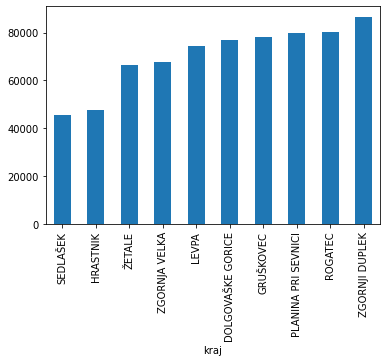

In [118]:
najcenejše_hiše_po_krajih = cena_na_m2.sort_values("cena")["cena"].head(10)
najcenejše_hiše_po_krajih.plot.bar()

Najcenejše hiše pa lahko dobimo v Sedlašku, kjer je cena za povprečno hišo "samo" 45.333€. 

Da zaključimo s poglavjem o cenah hiš glede na lokacije. 
Ovrgli smo našo prvo hipotezo, saj so najdražje hiše na m^2 v Jagodjah in ne v Ljubljani.
Drugo hipotezo pa smo potrdili, čeprav so najdražje hiše v Ičićih na Hrvaškem sta na drugem in tretjem mestu dve mesti iz slovenske obale.

## Kako cene hiš padajo ali naraščajo skozi čas

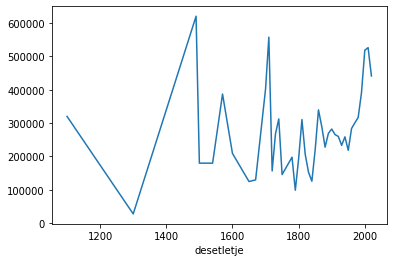

In [149]:
hise['desetletje'] = 10 * (hise.leto // 10)

hise_po_desetletjih = hise.groupby("desetletje")
b = hise_po_desetletjih.mean()["cena"].plot()

Kot vidimo iz grafa, cene ne naraščajo linearno. Ker je starih hiš bolj malo , cene hitreje bolj nihajo. Zato je smiselno, da bolj podrobno pogledamo hiše, ki niso starejše od 100 let. 

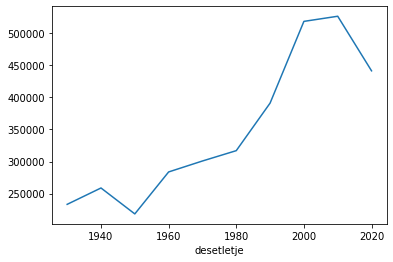

In [151]:
nove_hise = hise[hise.desetletje > 1920]
hise_po_desetletjih = nove_hise.groupby("desetletje")
b = hise_po_desetletjih.mean()["cena"].plot()

Tu vidimo, da starejša kot je hiša, cenejša bo. Kar se zdi smiselno. Opazimo pa v zadnejm desetletju občuten padec cen, ki ceno novogradnje postavi pod tiste hiše, ki so stare 10-20 let.

## Ali se splača imeti več nadstropji?

In [154]:
hise_klet = hise.groupby("ima_klet")
hise_klet.mean()

,leto,cena,povrsina_zemljisca,povrsina_hise,cene_na_m2,razmerje,desetletje
ima_klet,,,,,,,
False,1978.355350,366602.357992,2152.940277,202.914135,NaN,3271.037788,1975.138705
True,1968.137066,347818.437259,3165.064975,258.054054,NaN,6653.823014,1964.362934


Hiše s kletjo so v povprečju starejše, večje in presenetljivo cenejše. Očitno tukaj glavno vlogo odigra dejstvo, da so hiše, ki imajo klet, v povprečju starejše (zato tudi cenejše) in da dodatni kvadratni metri v kleti niso tako cenjeni kot tisti v pritličju ali drugih nadstropjih.

In [186]:
def stevilo_nadstropij(nadstropja):
    niz = str(nadstropja)
    if "P" in niz:
        return len(niz.split("+"))
    else:
        return None

In [205]:
st_nadstropij = hise["nadstropja"].apply(stevilo_nadstropij)
hi = pd.merge(st_nadstropij, hise, left_on="id", right_on="id").groupby("nadstropja_x")
hi.mean()["cena"]

nadstropja_x
1.0    366525.690476
2.0    326752.209150
3.0    366402.262661
4.0    444207.280335
5.0    487285.714286
Name: cena, dtype: float64

<AxesSubplot:xlabel='nadstropja_x'>

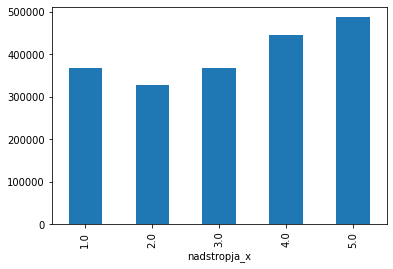

In [206]:
hi.mean()["cena"].plot.bar(x='nadstropja_x', y='cena')

Hiše z več nadstropji so praviloma res dražje kot tiste z manj. Edina izjema so hiše s samo enim nadstropjem oziroma samo s pritličjem. Te so namreč v povprečju dražje kot tiste z dvema in celo tiste s tremi nadstropji.